# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Import Dataset

In [70]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes
class_sample_data = df_catalysis_dataset.sample(frac = 0.40,random_state = 0)
class_sample_data

,M1,M1_atom_number,M2,M2_atom_number,M3,M3_atom_number,Support,Support_ID,M2_mol,M3_mol,...,C2y,C2H6y,C2H4y,COy,CO2y,C2s,C2H6s,C2H4s,COs,CO2s
Name,,,,,,,,,,,,,,,,,,,,,
Mn-FeMoO4/SiO2,Mn,25,Fe,26,Mo,42,SiO2,11,0.185,0.185,...,4.62,0.57,4.05,32.72,4.96,10.85,1.34,9.51,76.83,11.65
Pd-Na2WO4/SiO2,Pd,46,Na,11,W,74,SiO2,11,0.370,0.185,...,4.39,2.67,1.72,0.06,15.47,26.07,15.86,10.21,0.36,91.86
Mn-Na2WO4/Al2O3,Mn,25,Na,11,W,74,Al2O3,2,0.370,0.185,...,6.12,1.03,5.09,6.38,2.00,55.04,9.26,45.77,57.37,17.99
Mn-MoOx/SiO2,Mn,25,n.a.,0,Mo,42,SiO2,11,0.000,0.185,...,1.32,0.68,0.64,13.06,1.46,11.97,6.17,5.80,118.40,13.24
Na/SiO2,n.a.,0,Na,11,n.a.,0,SiO2,11,0.370,0.000,...,1.43,0.88,0.55,0.22,0.30,31.71,19.51,12.20,4.88,6.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pd-Na2WO4/SiO2,Pd,46,Na,11,W,74,SiO2,11,0.370,0.185,...,1.49,0.54,0.95,3.29,11.33,12.32,4.47,7.86,27.21,93.71
Mn-Na/SiO2,Mn,25,Na,11,n.a.,0,SiO2,11,0.370,0.000,...,0.60,0.41,0.19,0.33,0.78,16.13,11.02,5.11,8.87,20.97
Zr-Na2WO4/SiO2,Zr,40,Na,11,W,74,SiO2,11,0.370,0.185,...,3.06,0.63,2.43,5.21,2.85,23.87,4.91,18.95,40.64,22.23


# Define Variables

In [71]:
x = class_sample_data[["Total_flow", "O2_flow", "CT", "M2_mol", "M3_mol","Temp"]]
print(x)

                 Total_flow  O2_flow    CT  M2_mol  M3_mol  Temp
Name                                                            
Mn-FeMoO4/SiO2           15      1.5  0.50   0.185   0.185   900
Pd-Na2WO4/SiO2           15      4.3  0.50   0.370   0.185   700
Mn-Na2WO4/Al2O3          15      1.3  0.50   0.370   0.185   800
Mn-MoOx/SiO2             10      0.4  0.75   0.000   0.185   850
Na/SiO2                  20      4.0  0.38   0.370   0.000   700
...                     ...      ...   ...     ...     ...   ...
Pd-Na2WO4/SiO2           10      1.2  0.75   0.370   0.185   850
Mn-Na/SiO2               20      1.7  0.38   0.370   0.000   700
Zr-Na2WO4/SiO2           15      0.6  0.50   0.370   0.185   900
SiO2                     10      0.9  0.75   0.000   0.000   850
Al2O3                    15      1.8  0.50   0.000   0.000   775

[5083 rows x 6 columns]


In [93]:
# CH4_conv, C2y, COy
class_sample_data['classifier'] = np.where(class_sample_data['C2s']>=50, True, False)
y = class_sample_data["classifier"]
print(class_sample_data[["classifier","C2s"]])

                 classifier    C2s
Name                              
Mn-FeMoO4/SiO2        False  10.85
Pd-Na2WO4/SiO2        False  26.07
Mn-Na2WO4/Al2O3        True  55.04
Mn-MoOx/SiO2          False  11.97
Na/SiO2               False  31.71
...                     ...    ...
Pd-Na2WO4/SiO2        False  12.32
Mn-Na/SiO2            False  16.13
Zr-Na2WO4/SiO2        False  23.87
SiO2                  False  36.15
Al2O3                  True  80.47

[5083 rows x 2 columns]


# Split the dataset into training and test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_test

,Total_flow,O2_flow,CT,M2_mol,M3_mol,Temp
Name,,,,,,
Mo-Na2WO4/SiO2,15,1.1,0.50,0.370,0.185,850
Mn-Na2WO4/Nb2O5,15,1.8,0.50,0.370,0.185,775
Zr-Na2WO4/SiO2,10,1.0,0.75,0.370,0.185,700
SiC,15,3.0,0.50,0.000,0.000,775
ZrO2,20,5.7,0.38,0.000,0.000,700
...,...,...,...,...,...,...
WOx/SiO2,15,0.6,0.50,0.000,0.185,700
Mo-Na2WO4/SiO2,20,0.9,0.38,0.370,0.185,700
Mn-BaWO4/SiO2,10,0.6,0.75,0.185,0.185,800


In [95]:
y_test.value_counts()

False    734
True     283
Name: classifier, dtype: int64

# Train the model on training set

In [96]:
#Create a svm Classifier
clf = SVC(kernel='sigmoid',C=1,gamma =10) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1, gamma=10, kernel='sigmoid')

# Predict

In [97]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[False False False ... False False False]


# Evaluate

In [98]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn, fp, fn, tp) # true negatives, false positives, false negatives , true positives

(734, 0, 283, 0)

Text(0.5, 1.0, 'ch4 vs temp')

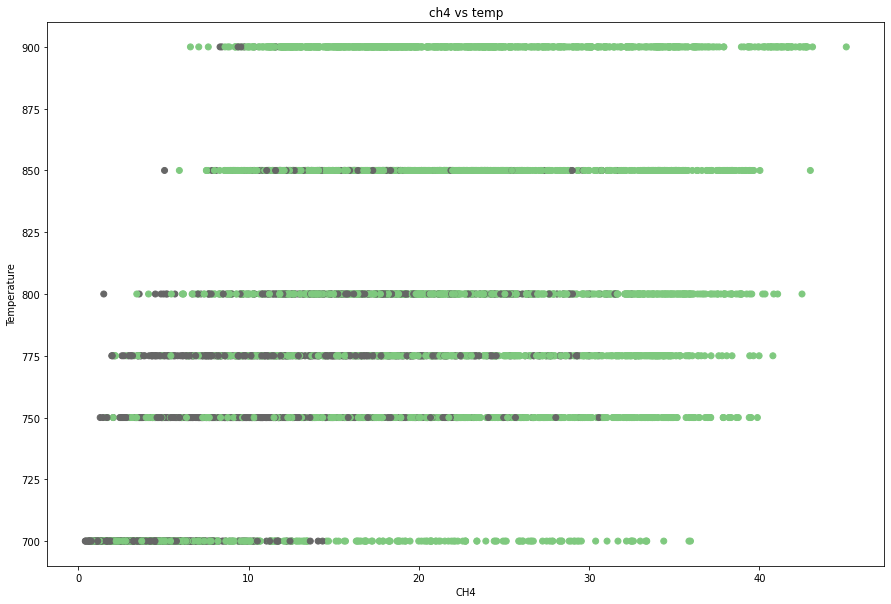

In [99]:
plt.figure(figsize=(15, 10))
plt.scatter(class_sample_data["CH4_conv"], class_sample_data["Temp"],c = class_sample_data["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")

# HyperPlane

In [100]:
# Get the separating hyperplane (Only works with Linear Kernels)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

AttributeError: coef_ is only available when using a linear kernel

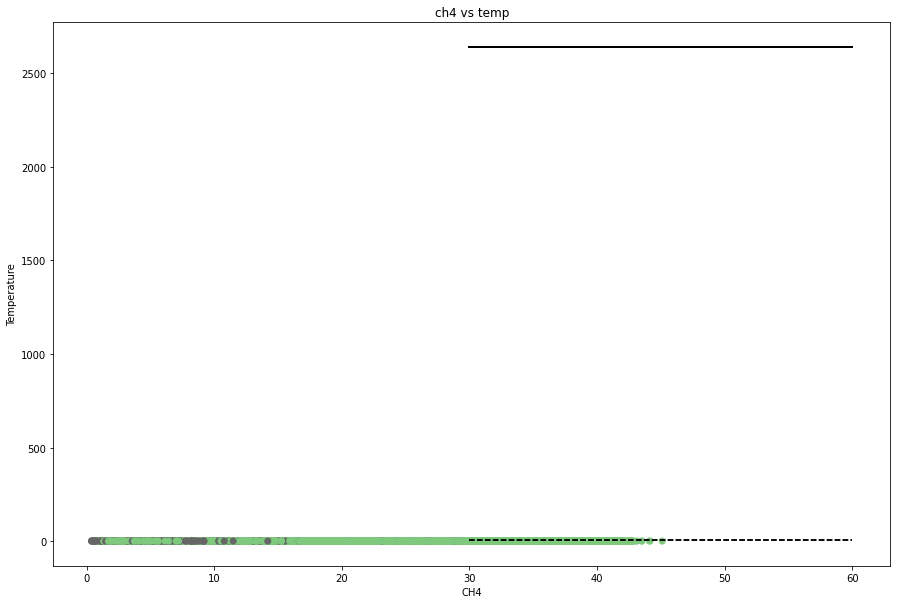

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(df_catalysis_dataset["CH4_conv"], df_catalysis_dataset["CT"],c = df_catalysis_dataset["classifier"], cmap = 'Accent')
plt.xlabel("CH4")
plt.ylabel("Temperature")
plt.title("ch4 vs temp")
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none');